In [1]:
# Here we will import everything needed to do the EDA and Feature Eningeering for every dataset.
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import matplotlib.style as style 
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import gc
gc.enable()

# Import SkLearn modules for data manipluation.
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Import IMUSD.
target = pd.read_csv('y_train.csv')
data = pd.read_csv('x_train.csv')
test = pd.read_csv('x_test.csv')

# Import Wine Quality.
redwine = pd.read_csv('winequality-red.csv')
whitewine = pd.read_csv('winequality-white.csv')

# Import Iris
from sklearn.datasets import load_iris
irisdata = load_iris()

# Import CCD
ccdata = pd.read_csv('creditcard.csv')


In [2]:
# First we will do the easy stuff.
irisdata.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# First lets make it into a Pandas dataframe.
iris = pd.DataFrame(irisdata.data)
iris.columns = irisdata.feature_names
iristarget = pd.DataFrame(irisdata.target)
iristarget.columns = ['target']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iristarget.groupby(['target']).count()

""
target
0
1
2


In [5]:
print(len(iristarget[iristarget['target']==0]))
print(len(iristarget[iristarget['target']==1]))
print(len(iristarget[iristarget['target']==2]))

50
50
50


In [6]:
# Next lets look at the data a bit.
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We see that the Iris Dataset has 150 entries with no missing values. It has 4 features with 3 equal classes. This dataset should be very easy to classify.

The next one we do will be the wine Quality datasets

In [7]:
redwine = pd.DataFrame(redwine)
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
whitewine = pd.DataFrame(whitewine)
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
winedata = pd.concat([redwine, whitewine])
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
winedata['quality'] = winedata['quality'].replace(to_replace=[0,1,2,3,4,5], value=0)
winedata['quality'] = winedata['quality'].replace(to_replace=[6,7,8,9,10], value=1)
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [11]:
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.633061
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.482007
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


We see that the wine dataset has 6497 rows with no missing values. It only has 1 classifier 'quality' which can be a 0 for bad or 1 for good. There are more bad then good but its a mostly balanced binary classifier.

Next I'm going to set up the Credit Card Data

In [12]:
ccdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
print(len(ccdata[ccdata["Class"]==0]))
len(ccdata[ccdata["Class"]==1])

284315


492

We see that the imbalance of the data is MASSIVE. With only 492 fraud detections we really need to do some serious manipulation to make the classifier accurate on the minority class. It will be easy for the model to just classify everything as 0 and get a 99.83% score. So in order to do this correctly we will need to get a 100% accuracy score.

Now I will finish the data munging with the IMUSD. This will require me to do a lot of feature engineering but first some EDA!

In [14]:
data.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [15]:
target.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


In [16]:
test.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,-5.5439
1,0_1,0,1,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,-8.0273
2,0_2,0,2,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,-11.2990
3,0_3,0,3,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,-12.2270
4,0_4,0,4,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,-10.4100


Here we see the different measurements used for the sensor data. Our goal is to predict what type of surface the robot is driving on. We expect that the different surfaces will make the robot shake and bump around in subtle ways so we can look at frequency graphs for each measurement channel. We will also look at the groupings and classes a bit more to see what is going on as it is strange that data would have groups.

This dataset was for a competition and the group labels can be used to find the correct labels for the test data by expanding the groups and using time series forcasting to see which group the test data belongs too. This does not involve machine learning or data science at all though so we will not be doing that. If you want to see a method that does do it you can look at this post here https://www.kaggle.com/trohwer64/submission-fourier-neighbour-detection-svm

In [17]:
# First lets explore the data some.
target.groupby(['surface']).agg(['count'])

,series_id,group_id
,count,count
surface,,
carpet,189,189
concrete,779,779
fine_concrete,363,363
hard_tiles,21,21
hard_tiles_large_space,308,308
soft_pvc,732,732
soft_tiles,297,297
tiled,514,514


In [18]:
# We see that there are 9 classes and the data is VERY imbalanced. Lets look at how the groups are set up
target.groupby(['group_id', 'surface']).agg(['count']).sort_values(['surface', 'group_id'])

,,series_id
,,count
group_id,surface,
7,carpet,56
25,carpet,51
52,carpet,11
60,carpet,71
0,concrete,57
5,concrete,9
12,concrete,57
20,concrete,57


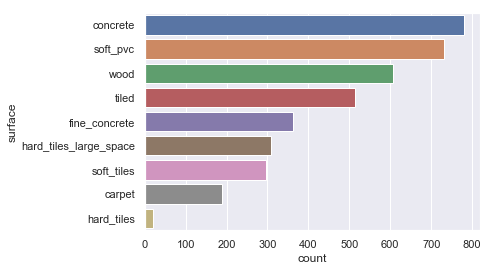

In [19]:
# Wow! The data is all over the place! There are a total of 73 groups with wildly different amounts of series in each group.
# Next lets look at some graphs of the data.

sns.set(style='darkgrid')
sns.countplot(y = 'surface',
              data = target,
              order = target['surface'].value_counts().index)
plt.show()


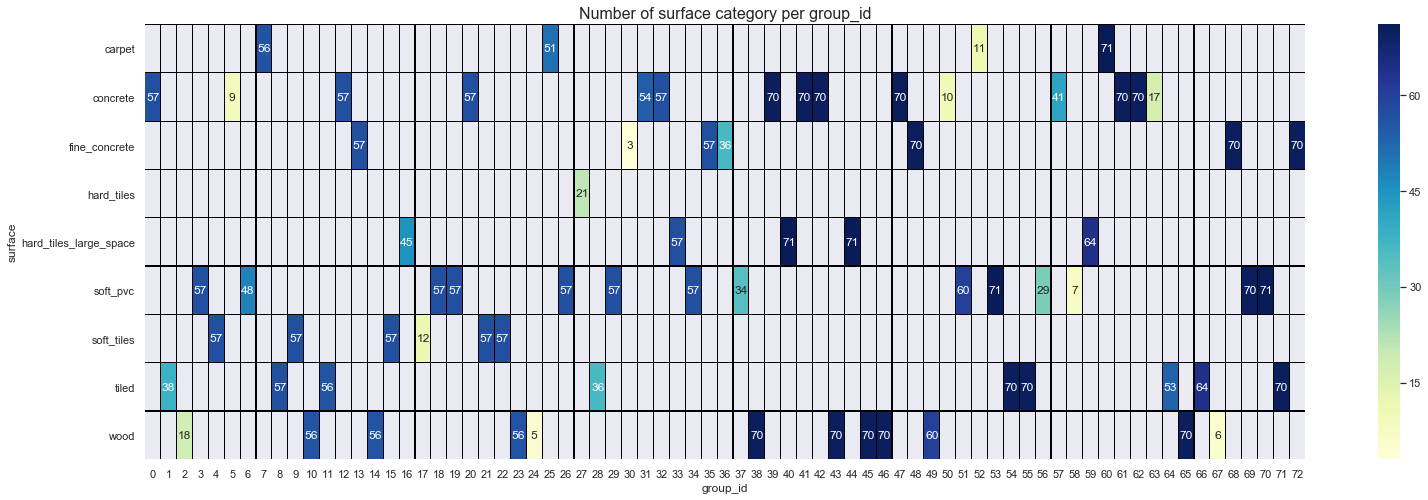

In [20]:
fig, ax = plt.subplots(1,1,figsize=(26,8))
tmp = pd.DataFrame(target.groupby(['group_id', 'surface'])['series_id'].count().reset_index())
m = tmp.pivot(index='surface', columns='group_id', values='series_id')
s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
s.set_title('Number of surface category per group_id', size=16)
plt.show()

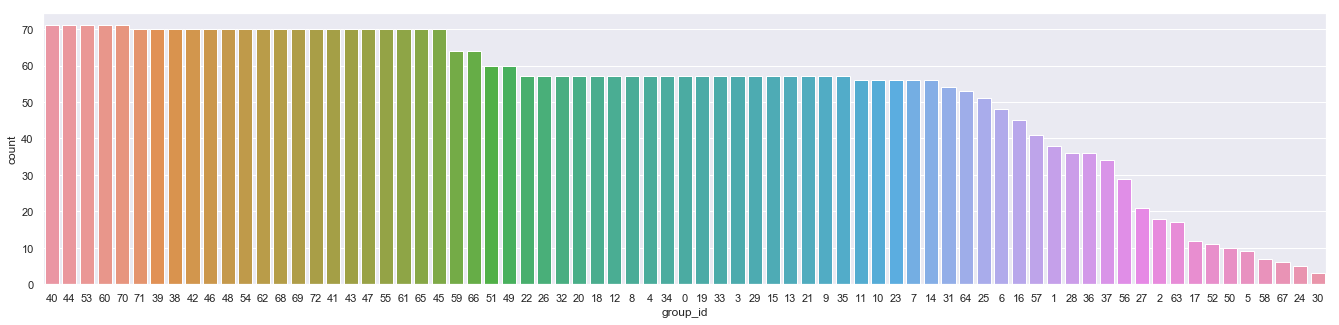

In [21]:
plt.figure(figsize=(23,5)) 
sns.set(style="darkgrid")
sns.countplot(x="group_id", data=target, order = target['group_id'].value_counts().index)
plt.show()

That was all the same data but beautifully visualized! So now I want to see the visualization of the frequency data of each measurement channel. If i'm correct this will show every little bump and we could use this data to classify each surface and they should be unique enough to do so.

In [22]:
series_dict = {}
for series in (data['series_id'].unique()):
    series_dict[series] = data[data['series_id'] == series]
    
def plotSeries(series_id):
    style.use('ggplot')
    plt.figure(figsize=(28, 16))
    print(target[target['series_id'] == series_id]['surface'].values[0].title())
    for i, col in enumerate(series_dict[series_id].columns[3:]):
        if col.startswith("o"):
            color = 'red'
        elif col.startswith("a"):
            color = 'green'
        else:
            color = 'blue'
        if i >= 7:
            i+=1
        plt.subplot(3, 4, i + 1)
        plt.plot(series_dict[series_id][col], color=color, linewidth=3)
        plt.title(col)

Carpet


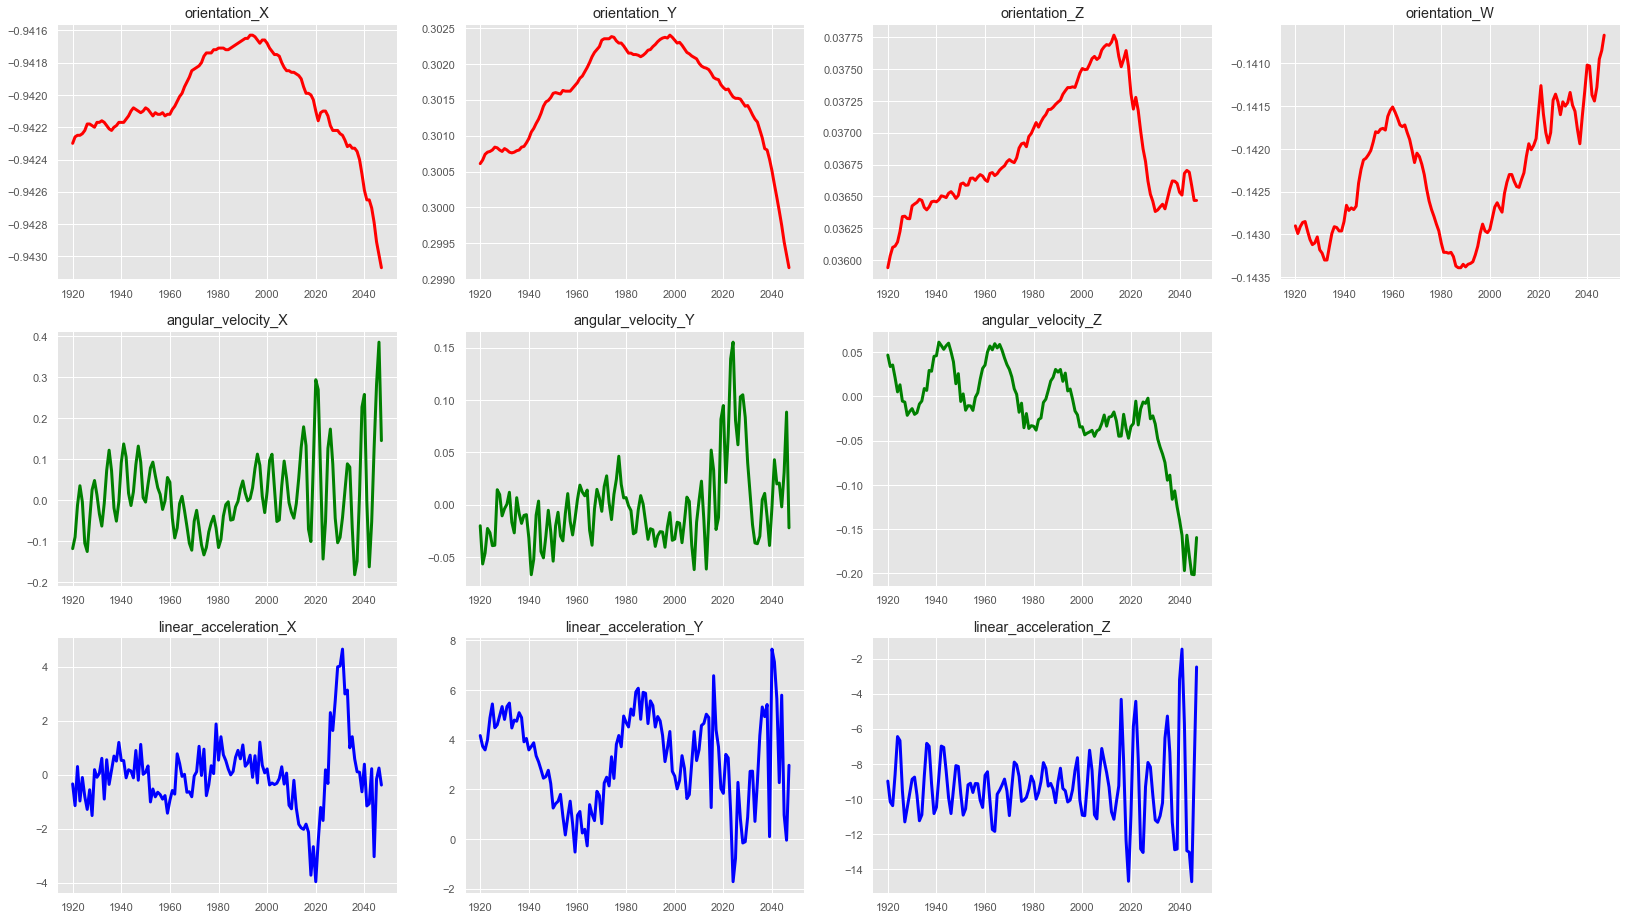

In [23]:
# Now you can choose which series measurement you want to visualize by changing the variable 'id_series' below.
id_series = 15
plotSeries(id_series)

So as we can see the frequency of each measurement is important as we suspected earlier! With this knowledge we could stich together the test and training data to where each measurement was taken. We are not going to, but the guy who did did it in a very creative way!

Here is how he did it and some of his code to visualize that aspect of the data
https://www.kaggle.com/trohwer64/submission-fourier-neighbour-detection-svm

In [24]:
train_x = pd.read_csv('X_train.csv')
train_y = pd.read_csv('y_train.csv')

In [25]:
import math

def prepare_data(t):
    def f(d):
        d=d.sort_values(by=['measurement_number'])
        return pd.DataFrame({
         'lx':[ d['linear_acceleration_X'].values ],
         'ly':[ d['linear_acceleration_Y'].values ],
         'lz':[ d['linear_acceleration_Z'].values ],
         'ax':[ d['angular_velocity_X'].values ],
         'ay':[ d['angular_velocity_Y'].values ],
         'az':[ d['angular_velocity_Z'].values ],
        })

    t= t.groupby('series_id').apply(f)

    def mfft(x):
        return [ x/math.sqrt(128.0) for x in np.absolute(np.fft.fft(x)) ][1:65]

    t['lx_f']=[ mfft(x) for x in t['lx'].values ]
    t['ly_f']=[ mfft(x) for x in t['ly'].values ]
    t['lz_f']=[ mfft(x) for x in t['lz'].values ]
    t['ax_f']=[ mfft(x) for x in t['ax'].values ]
    t['ay_f']=[ mfft(x) for x in t['ay'].values ]
    t['az_f']=[ mfft(x) for x in t['az'].values ]
    return t

In [26]:
t=prepare_data(train_x)
t=pd.merge(t,train_y[['series_id','surface','group_id']],on='series_id')
t=t.rename(columns={"surface": "y"})

In [27]:
def aggf(d, feature):
    va= np.array(d[feature].tolist())
    mean= sum(va)/va.shape[0]
    var= sum([ (va[i,:]-mean)**2 for i in range(va.shape[0]) ])/va.shape[0]
    dev= [ math.sqrt(x) for x in var ]
    return pd.DataFrame({
        'mean': [ mean ],
        'dev' : [ dev ],
    })

display={
'hard_tiles_large_space':'r-.',
'concrete':'g-.',
'tiled':'b-.',

'fine_concrete':'r-',
'wood':'g-',
'carpet':'b-',
'soft_pvc':'y-',

'hard_tiles':'r--',
'soft_tiles':'g--',
}

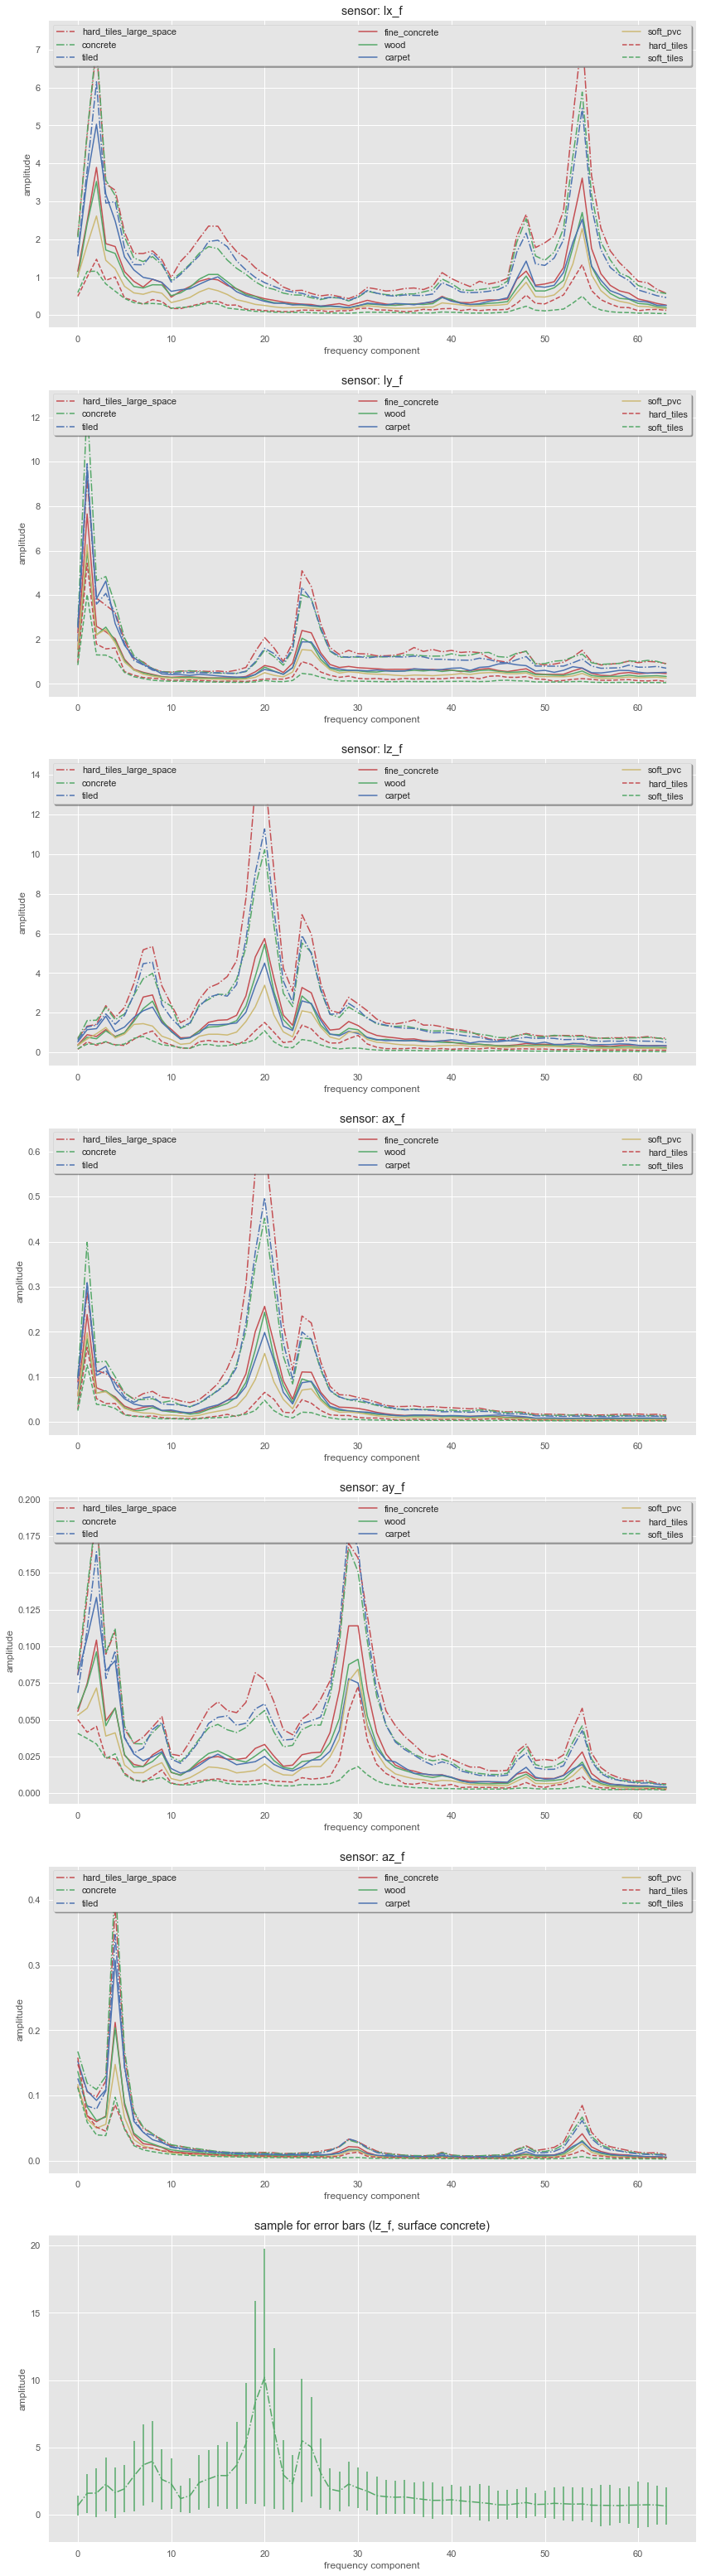

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8*7))

features=['lx_f','ly_f','lz_f','ax_f','ay_f','az_f']
count=0

for feature in features:
    stat= t.groupby('y').apply(aggf,feature)
    stat.index= stat.index.droplevel(-1)
    b=[*range(len(stat.at['carpet','mean']))]

    count+=1
    plt.subplot(len(features)+1,1,count)
    for i,(k,v) in enumerate(display.items()):
        plt.plot(b, stat.at[k,'mean'], v, label=k)
        # plt.errorbar(b, stat.at[k,'mean'], yerr=stat.at[k,'dev'], fmt=v)
   
    leg = plt.legend(loc='best', ncol=3, mode="expand", shadow=True, fancybox=True)
    plt.title("sensor: " + feature)
    plt.xlabel("frequency component")
    plt.ylabel("amplitude")

count+=1
plt.subplot(len(features)+1,1,count)
k='concrete'
v=display[k]
feature='lz_f'
stat= t.groupby('y').apply(aggf,feature)
stat.index= stat.index.droplevel(-1)
b=[*range(len(stat.at['carpet','mean']))]

plt.errorbar(b, stat.at[k,'mean'], yerr=stat.at[k,'dev'], fmt=v)
plt.title("sample for error bars (lz_f, surface concrete)")
plt.xlabel("frequency component")
plt.ylabel("amplitude")

plt.show()

In [29]:
del train_x, train_y
gc.collect()

79

Very awesome visualization of the frequency data! I'll be sure to keep this in my toolkit for the future.

Now lets look at the distributaion of each feature for each class.

In [30]:
classes = (target['surface'].value_counts()).index
aux = data.merge(target, on='series_id', how='inner')

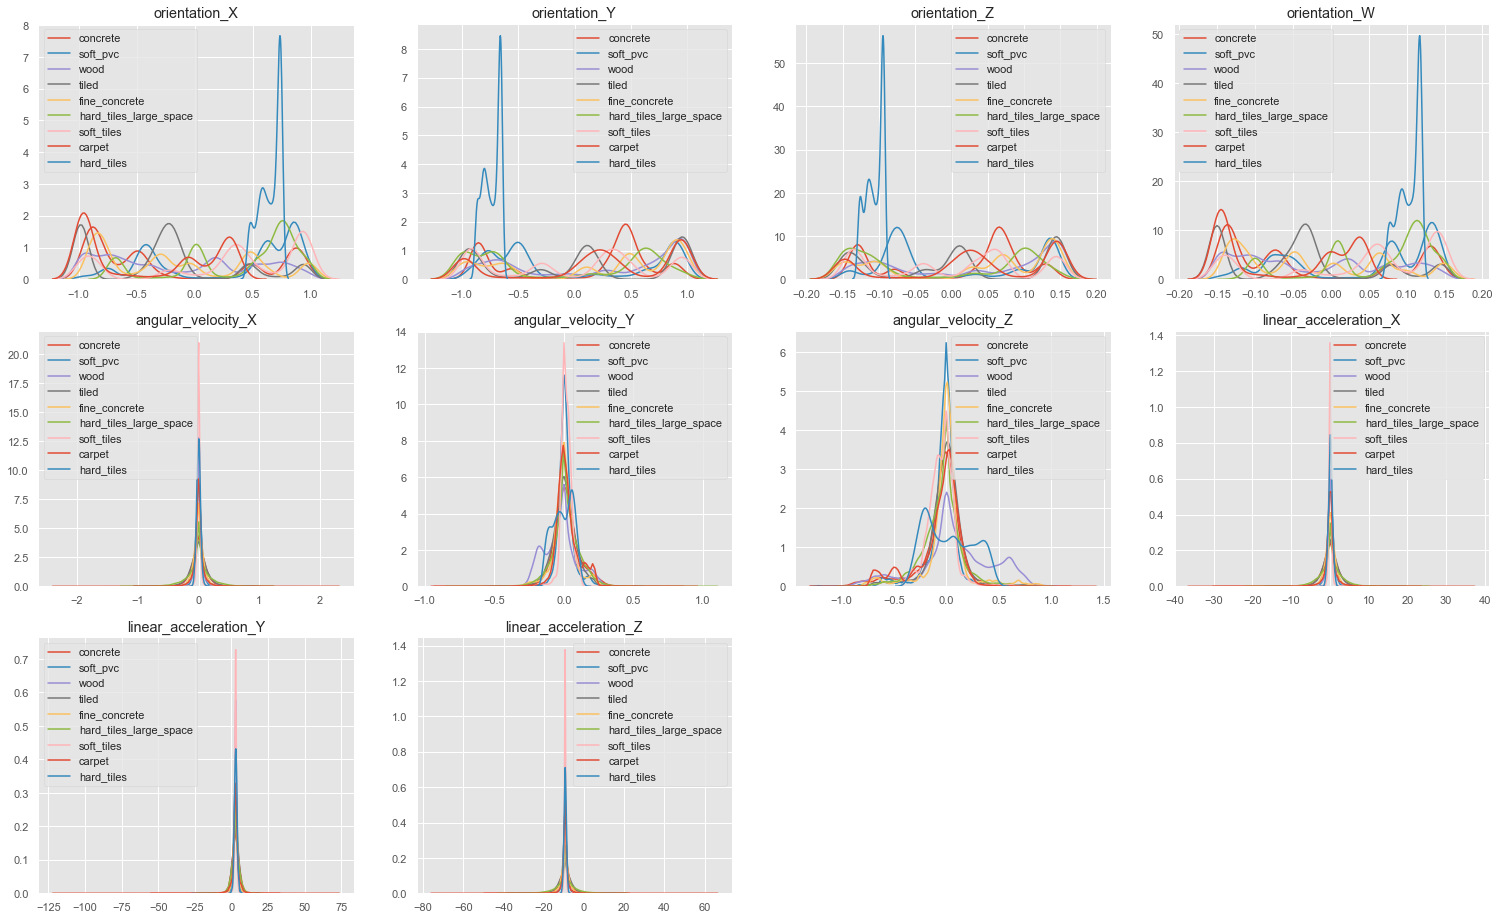

In [31]:
plt.figure(figsize=(26, 16))
for i,col in enumerate(aux.columns[3:13]):
    ax = plt.subplot(3,4,i+1)
    ax = plt.title(col)
    for surface in classes:
        surface_feature = aux[aux['surface'] == surface]
        sns.kdeplot(surface_feature[col], label = surface)

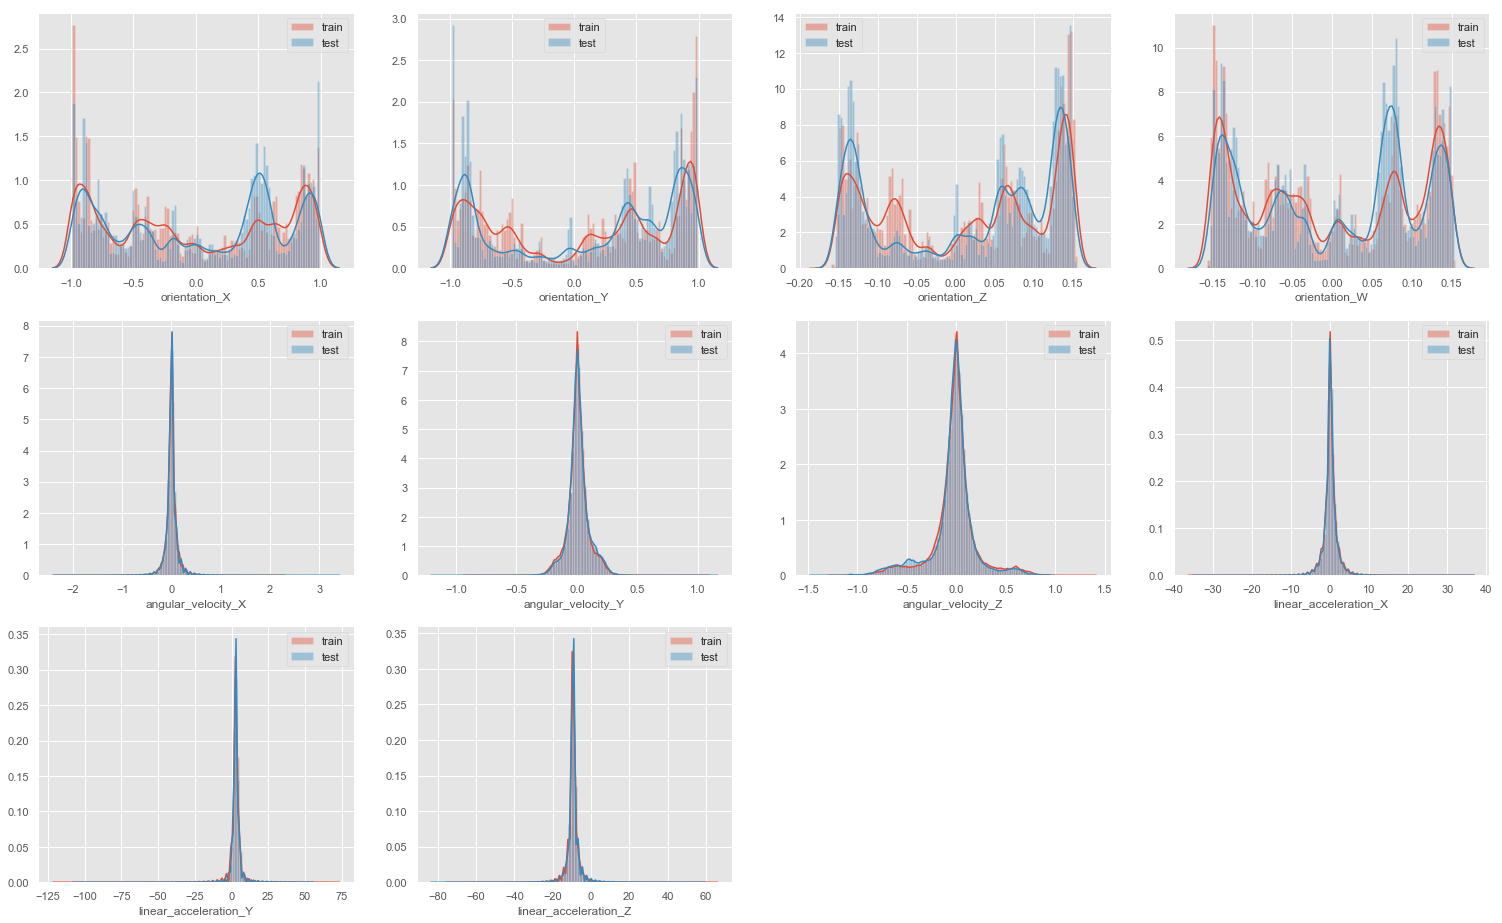

In [32]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(data.columns[3:]):
    ax = plt.subplot(3, 4, i + 1)
    sns.distplot(data[col], bins=100, label='train')
    sns.distplot(test[col], bins=100, label='test')
    ax.legend() 

Awesome, So we see that each measurement has a normal distribution for each class and that the training and test data are very similar.

Now lets do the hard/fun part. The data feature engineering!

In [33]:
# First we will convert the quaterion to euler angles to give the model more to work with.
def quaternion_to_euler(x, y, z, w):
    import math
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    X = math.atan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    Y = math.asin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    Z = math.atan2(t3, t4)

    return X, Y, Z

def fe_step0 (actual):
    
    # https://www.mathworks.com/help/aeroblks/quaternionnorm.html
    # https://www.mathworks.com/help/aeroblks/quaternionmodulus.html
    # https://www.mathworks.com/help/aeroblks/quaternionnormalize.html
        
    actual['norm_quat'] = (actual['orientation_X']**2 + actual['orientation_Y']**2 + actual['orientation_Z']**2 + actual['orientation_W']**2)
    actual['mod_quat'] = (actual['norm_quat'])**0.5
    actual['norm_X'] = actual['orientation_X'] / actual['mod_quat']
    actual['norm_Y'] = actual['orientation_Y'] / actual['mod_quat']
    actual['norm_Z'] = actual['orientation_Z'] / actual['mod_quat']
    actual['norm_W'] = actual['orientation_W'] / actual['mod_quat']
    
    return actual

In [34]:
data = fe_step0(data)
test = fe_step0(test)
print(data.shape)
data.head()

(487680, 19)


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,norm_quat,mod_quat,norm_X,norm_Y,norm_Z,norm_W
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,0.999997,0.999999,-0.758531,-0.634351,-0.10488,-0.10597
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,0.999995,0.999998,-0.758532,-0.634342,-0.10490,-0.10600
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,1.000006,1.000003,-0.758528,-0.634348,-0.10492,-0.10597
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,1.000009,1.000005,-0.758516,-0.634357,-0.10495,-0.10597
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,0.999995,0.999997,-0.758522,-0.634352,-0.10495,-0.10596


In [35]:
def fe_step1 (actual):
    """Quaternions to Euler Angles"""
    
    x, y, z, w = actual['norm_X'].tolist(), actual['norm_Y'].tolist(), actual['norm_Z'].tolist(), actual['norm_W'].tolist()
    nx, ny, nz = [], [], []
    for i in range(len(x)):
        xx, yy, zz = quaternion_to_euler(x[i], y[i], z[i], w[i])
        nx.append(xx)
        ny.append(yy)
        nz.append(zz)
    
    actual['euler_x'] = nx
    actual['euler_y'] = ny
    actual['euler_z'] = nz
    return actual

In [36]:
data = fe_step1(data)
test = fe_step1(test)
print (data.shape)
data.head()

(487680, 22)


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,...,linear_acceleration_Z,norm_quat,mod_quat,norm_X,norm_Y,norm_Z,norm_W,euler_x,euler_y,euler_z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,...,-9.7532,0.999997,0.999999,-0.758531,-0.634351,-0.10488,-0.10597,2.843273,-0.024668,1.396667
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,...,-9.4128,0.999995,0.999998,-0.758532,-0.634342,-0.10490,-0.10600,2.843201,-0.024662,1.396651
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,...,-8.7267,1.000006,1.000003,-0.758528,-0.634348,-0.10492,-0.10597,2.843222,-0.024728,1.396677
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,...,-10.0960,1.000009,1.000005,-0.758516,-0.634357,-0.10495,-0.10597,2.843183,-0.024769,1.396712
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,...,-10.4410,0.999995,0.999997,-0.758522,-0.634352,-0.10495,-0.10596,2.843197,-0.024785,1.396698


Cool now we have the angles we want for both the test and training sets. Now lets make the rest of the features we want to be able to classify the data with the largest number of models as possible!

In [37]:
def feat_eng(data):
    
    df = pd.DataFrame()
    data['totl_anglr_vel'] = (data['angular_velocity_X']**2 + data['angular_velocity_Y']**2 + data['angular_velocity_Z']**2)** 0.5
    data['totl_linr_acc'] = (data['linear_acceleration_X']**2 + data['linear_acceleration_Y']**2 + data['linear_acceleration_Z']**2)**0.5
    data['totl_xyz'] = (data['orientation_X']**2 + data['orientation_Y']**2 + data['orientation_Z']**2)**0.5
    data['acc_vs_vel'] = data['totl_linr_acc'] / data['totl_anglr_vel']
    
    def mean_change_of_abs_change(x):
        return np.mean(np.diff(np.abs(np.diff(x))))
    
    for col in data.columns:
        if col in ['row_id','series_id','measurement_number']:
            continue
        df[col + '_mean'] = data.groupby(['series_id'])[col].mean()
        df[col + '_median'] = data.groupby(['series_id'])[col].median()
        df[col + '_max'] = data.groupby(['series_id'])[col].max()
        df[col + '_min'] = data.groupby(['series_id'])[col].min()
        df[col + '_std'] = data.groupby(['series_id'])[col].std()
        df[col + '_range'] = df[col + '_max'] - df[col + '_min']
        df[col + '_maxtoMin'] = df[col + '_max'] / df[col + '_min']
        df[col + '_mean_abs_chg'] = data.groupby(['series_id'])[col].apply(lambda x: np.mean(np.abs(np.diff(x))))
        df[col + '_mean_change_of_abs_change'] = data.groupby('series_id')[col].apply(mean_change_of_abs_change)
        df[col + '_abs_max'] = data.groupby(['series_id'])[col].apply(lambda x: np.max(np.abs(x)))
        df[col + '_abs_min'] = data.groupby(['series_id'])[col].apply(lambda x: np.min(np.abs(x)))
        df[col + '_abs_avg'] = (df[col + '_abs_min'] + df[col + '_abs_max'])/2
    return df

In [38]:
del data['row_id']
del test['row_id']
del data['measurement_number']
del test['measurement_number']

In [39]:
%%time
data = feat_eng(data)
test = feat_eng(test)
print ("New features: ",data.shape)

New features:  (3810, 276)
Wall time: 2min 36s


Success! Now lets check to make sure there are no missing values.

In [40]:
data.fillna(0,inplace=True)
test.fillna(0,inplace=True)
data.replace(-np.inf,0,inplace=True)
data.replace(np.inf,0,inplace=True)
test.replace(-np.inf,0,inplace=True)
test.replace(np.inf,0,inplace=True)

In [41]:
data.head()

,series_id,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,...,norm_Y,norm_Z,norm_W,euler_x,euler_y,euler_z,totl_anglr_vel,totl_linr_acc,totl_xyz,acc_vs_vel
0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,...,-0.634351,-0.10488,-0.10597,2.843273,-0.024668,1.396667,0.109076,10.005392,0.994368,91.728917
1,0,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,...,-0.634342,-0.10490,-0.10600,2.843201,-0.024662,1.396651,0.074240,9.538638,0.994364,128.483970
2,0,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,...,-0.634348,-0.10492,-0.10597,2.843222,-0.024728,1.396677,0.030428,8.874697,0.994372,291.666195
3,0,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,...,-0.634357,-0.10495,-0.10597,2.843183,-0.024769,1.396712,0.025082,10.164638,0.994374,405.249042
4,0,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,...,-0.634352,-0.10495,-0.10596,2.843197,-0.024785,1.396698,0.010603,10.556132,0.994368,995.561076


In [42]:
test.head()

,series_id,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,...,norm_Y,norm_Z,norm_W,euler_x,euler_y,euler_z,totl_anglr_vel,totl_linr_acc,totl_xyz,acc_vs_vel
0,0,-0.025773,-0.98864,-0.14801,0.003350,-0.006524,-0.001071,-0.027390,0.10043,4.2061,...,-0.988644,-0.148011,0.003350,2.844735,-0.014254,3.091598,0.028177,6.959611,0.999990,247.000018
1,0,-0.025683,-0.98862,-0.14816,0.003439,-0.113960,0.083987,-0.060590,-0.70889,3.9905,...,-0.988624,-0.148161,0.003439,2.844435,-0.014411,3.091804,0.153987,8.992450,0.999990,58.397648
2,0,-0.025617,-0.98861,-0.14826,0.003571,-0.080518,0.114860,-0.037177,1.45710,2.2828,...,-0.988610,-0.148260,0.003571,2.844239,-0.014658,3.091976,0.145114,11.619024,0.999993,80.068203
3,0,-0.025566,-0.98862,-0.14817,0.003609,0.070067,0.033820,-0.035904,0.71096,1.8582,...,-0.988625,-0.148171,0.003609,2.844420,-0.014712,3.092086,0.085687,12.387813,0.999989,144.570382
4,0,-0.025548,-0.98866,-0.14792,0.003477,0.152050,-0.029016,-0.015314,3.39960,2.7881,...,-0.988663,-0.147920,0.003477,2.844920,-0.014434,3.092079,0.155550,11.300393,0.999991,72.648208


Lets add our targets to our data so that every series measurement gets the target. This will be useful for doing different types of models on this data

In [43]:
data = target.merge(data, on='series_id')

In [44]:
target.head()

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


Here we will create two dictionaries for encoding and decoding our data. We could use sklearn's label maker but we want our code to be friendly with every model so lets do it the harder way.

In [45]:
encode_dic = {'fine_concrete': 0, 
              'concrete': 1, 
              'soft_tiles': 2, 
              'tiled': 3, 
              'soft_pvc': 4,
              'hard_tiles_large_space': 5, 
              'carpet': 6, 
              'hard_tiles': 7, 
              'wood': 8}

In [46]:
decode_dic = {0: 'fine_concrete',
              1: 'concrete',
              2: 'soft_tiles',
              3: 'tiled',
              4: 'soft_pvc',
              5: 'hard_tiles_large_space',
              6: 'carpet',
              7: 'hard_tiles',
              8: 'wood'}

And lets go ahead and encode our surfaces so they are usable in our models.

In [47]:
data['surface'] = data['surface'].map(encode_dic).astype(int)
target['surface'] = target['surface'].map(encode_dic).astype(int)

In [48]:
print(len(data))
data.head()

487680


,series_id,group_id,surface,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,...,norm_Y,norm_Z,norm_W,euler_x,euler_y,euler_z,totl_anglr_vel,totl_linr_acc,totl_xyz,acc_vs_vel
0,0,13,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,...,-0.634351,-0.10488,-0.10597,2.843273,-0.024668,1.396667,0.109076,10.005392,0.994368,91.728917
1,0,13,0,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,...,-0.634342,-0.10490,-0.10600,2.843201,-0.024662,1.396651,0.074240,9.538638,0.994364,128.483970
2,0,13,0,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,...,-0.634348,-0.10492,-0.10597,2.843222,-0.024728,1.396677,0.030428,8.874697,0.994372,291.666195
3,0,13,0,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,...,-0.634357,-0.10495,-0.10597,2.843183,-0.024769,1.396712,0.025082,10.164638,0.994374,405.249042
4,0,13,0,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,...,-0.634352,-0.10495,-0.10596,2.843197,-0.024785,1.396698,0.010603,10.556132,0.994368,995.561076


In [49]:
# Lets also keep a seperate set of our whole data before we split it up so we can use it for modeling later.
whole_data = data
whole_target = data['surface']

Perfect! We will kill the features that we don't want to train on such as series_id and group_id later on in our data before we save it.

Now lets make some validation data! I hand picked the data after searching through which groups are later in the time series forcast. I picked groups by size and date in the measurement process. I put in about 20% of the data to be used as validation data. Models that will use cross fold validation will do so using the whole data.

Since hard_tiles only has 1 group I took the last couple series from it which is why there are two different code blocks for this process.

In [50]:
# This is the process I used to get the groups.
# I basically went through and manually looked at the attributes of each group and decided on them.

data.groupby(['group_id']).agg(len).head()

,series_id,surface,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,...,norm_Y,norm_Z,norm_W,euler_x,euler_y,euler_z,totl_anglr_vel,totl_linr_acc,totl_xyz,acc_vs_vel
group_id,,,,,,,,,,,,,,,,,,,,,
0,7296,7296,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,...,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0
1,4864,4864,4864.0,4864.0,4864.0,4864.0,4864.0,4864.0,4864.0,4864.0,...,4864.0,4864.0,4864.0,4864.0,4864.0,4864.0,4864.0,4864.0,4864.0,4864.0
2,2304,2304,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,...,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0,2304.0
3,7296,7296,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,...,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0
4,7296,7296,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,...,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0


This was a clever solution I came up with to create seperate data frames with the validation data and the whole data. I then merged the data so that it would delete from the whole data any data that is in the validation set then assigned that to the whole data.

The validation set is vdata and vtarget.

In [51]:
num = [68, 72, 61, 62, 63, 22, 17, 71, 66, 70, 69, 58, 59, 44, 60, 52, 67, 65, 49]
nums = [1671, 1610, 1455, 1454, 1399]
ht_vd = data[data['surface']==7]
ht = ht_vd[ht_vd.series_id.isin(nums)]
vdata = data[data.group_id.isin(num)]
vdata = pd.concat((vdata, ht))
vdata = vdata.sort_values('series_id')

tar = target[target.series_id.isin(nums)]
vtarget = target[target.group_id.isin(num)]
vtarget = pd.concat((vtarget, tar))
vtarget = vtarget.sort_values('series_id')

In [52]:
vtarget.head()

,series_id,group_id,surface
4,4,22,2
22,22,22,2
55,55,22,2
59,59,22,2
95,95,22,2


In [53]:
# To verify that the validation set only has certain groups.
vdata.groupby(['group_id']).agg(len).head()

,series_id,surface,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,...,norm_Y,norm_Z,norm_W,euler_x,euler_y,euler_z,totl_anglr_vel,totl_linr_acc,totl_xyz,acc_vs_vel
group_id,,,,,,,,,,,,,,,,,,,,,
17,1536,1536,1536.0,1536.0,1536.0,1536.0,1536.0,1536.0,1536.0,1536.0,...,1536.0,1536.0,1536.0,1536.0,1536.0,1536.0,1536.0,1536.0,1536.0,1536.0
22,7296,7296,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,...,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0,7296.0
27,640,640,640.0,640.0,640.0,640.0,640.0,640.0,640.0,640.0,...,640.0,640.0,640.0,640.0,640.0,640.0,640.0,640.0,640.0,640.0
44,9088,9088,9088.0,9088.0,9088.0,9088.0,9088.0,9088.0,9088.0,9088.0,...,9088.0,9088.0,9088.0,9088.0,9088.0,9088.0,9088.0,9088.0,9088.0,9088.0
49,7680,7680,7680.0,7680.0,7680.0,7680.0,7680.0,7680.0,7680.0,7680.0,...,7680.0,7680.0,7680.0,7680.0,7680.0,7680.0,7680.0,7680.0,7680.0,7680.0


In [54]:
data =(pd.merge(data,vdata,indicator=True, how='outer')
         .query('_merge=="left_only"')
         .drop('_merge', axis=1))

In [55]:
target =(pd.merge(target,vtarget,indicator=True, how='outer')
         .query('_merge=="left_only"')
         .drop('_merge', axis=1))

In [56]:
len(target)

2804

In [57]:
len(data)

358912

As you can see some of the data is missing from 'target' and 'data'. This data got put into the validation set.

Lets go ahead and delete the features we don't want to train on then export our newly minted datasets so we don't have to do all of this feature engineering with every model!

We will first create a 'long' version of the target variables for some of our models. Basically adding a surface value for every measurement instead of the series. Reshaping the targets from 2804 to 358912.

We will also export our iris and wine datasets for the same reason

In [58]:
ltarget = target.merge(data, on='series_id')
lvtarget = vtarget.merge(vdata, on='series_id')

ltarget = ltarget['surface_x']
lvtarget = lvtarget['surface_x']

In [59]:
print(len(ltarget))
ltarget.head()

358912


0    0
1    0
2    0
3    0
4    0
Name: surface_x, dtype: int32

In [60]:
print(len(lvtarget))
lvtarget.head()

128768


0    2
1    2
2    2
3    2
4    2
Name: surface_x, dtype: int32

In [61]:
del data['series_id']
del data['surface']
del data['group_id']
del vdata['series_id']
del vdata['surface']
del vdata['group_id']
del test['series_id']

In [62]:
print(data.shape)
print(vdata.shape)
test.shape

(358912, 23)
(128768, 23)


(488448, 23)

In [63]:
data.to_csv('data.csv', index=False)
vdata.to_csv('vdata.csv', index=False)
target.to_csv('target.csv', index=False)
vtarget.to_csv('vtarget.csv', index=False)
ltarget.to_csv('ltarget.csv', index=False)
lvtarget.to_csv('lvtarget.csv', index=False)
test.to_csv('test.csv', index=False)
whole_data.to_csv('whole_data.csv', index=False)
whole_target.to_csv('whole_target.csv', index=False)

iris.to_csv('irisdata.csv', index=False)
iristarget.to_csv('iristarget.csv', index=False)
winedata.to_csv('winedata.csv', index=False)

And with that we are done with out EDA and data engineering! Please Check out the other model's notebooks for the implimentation of the data in each method. Thanks for reading!